# Credit Card Fraud Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Packages

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data
Dataset Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
df = pd.read_csv('/content/drive/My Drive/Credit-Card-Fraud-Detection-main/Credit-Card-Fraud-Detection-main/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Check for imbalance

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data Preprocessing

In [6]:
#input and target Cols
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

### Under Sampling

In [7]:
#Over Sampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [8]:
y.value_counts()

Class
0        284315
1        284315
dtype: int64

### Data Preprocessing

In [9]:
#Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=20)

In [10]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Model 

In [12]:
model =Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 10,validation_data = (X_val, y_val))

Epoch 1/10
37/37 [==============================] - 1s 14ms/step - loss: 0.4420 - accuracy: 0.8575 - val_loss: 0.2930 - val_accuracy: 0.9037
Epoch 2/10
37/37 [==============================] - 0s 11ms/step - loss: 0.2238 - accuracy: 0.9264 - val_loss: 0.1688 - val_accuracy: 0.9454
Epoch 3/10
37/37 [==============================] - 0s 9ms/step - loss: 0.1433 - accuracy: 0.9534 - val_loss: 0.1214 - val_accuracy: 0.9593
Epoch 4/10
37/37 [==============================] - 0s 10ms/step - loss: 0.1099 - accuracy: 0.9630 - val_loss: 0.0996 - val_accuracy: 0.9662
Epoch 5/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0928 - accuracy: 0.9685 - val_loss: 0.0864 - val_accuracy: 0.9699
Epoch 6/10
37/37 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 0.9720 - val_loss: 0.0769 - val_accuracy: 0.9732
Epoch 7/10
37/37 [==============================] - 0s 9ms/step - loss: 0.0730 - accuracy: 0.9749 - val_loss: 0.0696 - val_accuracy: 0.9754
Epoch 8/10
37/37

### Model Evaluation

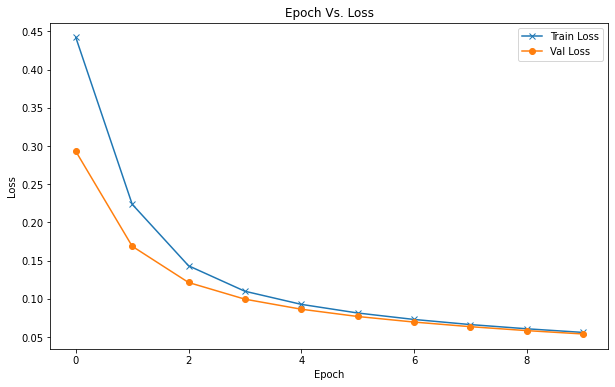

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],'-x');
plt.plot(history.history['val_loss'],'-o')
plt.legend(['Train Loss','Val Loss'])
plt.title('Epoch Vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch');

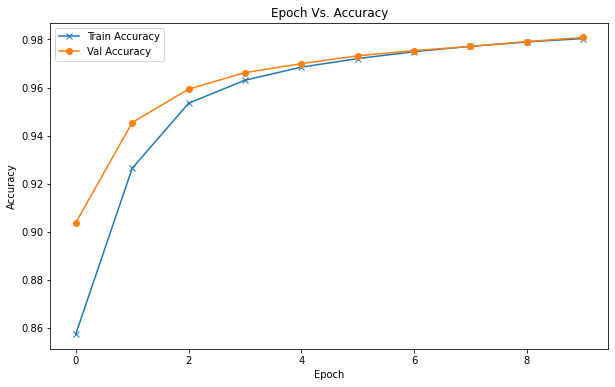

In [16]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],'-x');
plt.plot(history.history['val_accuracy'],'-o')
plt.legend(['Train Accuracy','Val Accuracy'])
plt.title('Epoch Vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch');

### Confusion matrix

In [17]:
predictions = model.predict(X_val)
y_pred = np.array([1 * (x[0]>=0.5) for x in predictions])

3554/3554 [==============================] - 4s 1ms/step


In [18]:
confusion_matrix(y_val, y_pred)

array([[56385,   537],
       [ 1644, 55160]])

In [19]:
print('Accuracy Score : ', accuracy_score(y_val,y_pred))
print('Precision Score : ', precision_score(y_val,y_pred))
print('Recall Score : ', recall_score(y_val,y_pred))

Accuracy Score :  0.9808223273481878
Precision Score :  0.9903585471389842
Recall Score :  0.9710583761706922


### Evaluation on unseen data

In [20]:
model.evaluate(X_test,y_test)

2844/2844 [==============================] - 4s 1ms/step - loss: 0.0522 - accuracy: 0.9821


[0.05216269940137863, 0.9821171164512634]

### Prediction for single input

In [21]:
def signle_pred(inp_data):
    pred = model.predict(np.expand_dims(inp_data, axis = 0))
    y_hat = np.array([1 * (x[0]>=0.5) for x in pred])
    print('Predicted Output',y_hat)

In [22]:
signle_pred(X_test[1])

1/1 [==============================] - 0s 16ms/step
Predicted Output [1]
